In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano.tensor as tt
import urllib
from bs4 import BeautifulSoup
%matplotlib inline

Using gpu device 0: GeForce GTX 670 (CNMeM is disabled, cuDNN not available)


In [2]:
urll='https://en.wikipedia.org/wiki/{}_NRL_season_results'
year='2016'
html=urllib.request.urlopen(urll.format(year)).read()
data=pd.read_html(html,header=1)

In [3]:
df=pd.concat(data[1:26])
df

,Date and time (Local),Venue (Broadcaster),Referees,Attendance Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Parramatta Eels,4-17,Brisbane Broncos,"3 Mar 2016, 8:05PM",Pirtek Stadium (Nine Network),Matt Cecchin/Alan Shortall,"17,324 / 20,741"
1,Manly-Warringah Sea Eagles,6-28,Canterbury-Bankstown Bulldogs,"4 Mar 2016, 8:05PM",Brookvale Oval (Nine Network),Gerard Sutton/Matt Noyen,"16,512 / 23,000"
2,Canberra Raiders,30-22,Penrith Panthers,"5 Mar 2016, 3:00PM",GIO Stadium (Fox Sports),Gavin Badger/Dave Munro,"11,297 / 25,011"
3,Wests Tigers,34-26,New Zealand Warriors,"5 Mar 2016, 5:30PM",Campbelltown Stadium (Fox Sports),Ashley Klein/Chris Sutton,"10,917 / 20,000"
4,North Queensland Cowboys,20-14,Cronulla-Sutherland Sharks,"5 Mar 2016, 7:30PM",1300SMILES Stadium (Fox Sports),Ben Cummins/Adam Devcich,"15,519 / 26,500"
5,Sydney Roosters,10-42,South Sydney Rabbitohs,"6 Mar 2016, 4:00PM",Allianz Stadium (Nine Network),Jared Maxwell/Adam Gee,"25,125 / 45,500"
6,Gold Coast Titans,30-12,Newcastle Knights,"6 Mar 2016, 6:30PM",Cbus Super Stadium (Fox Sports),Henry Perenara/Chris James,"8,313 / 27,400"
7,Melbourne Storm,18-16,St. George Illawarra Dragons,"7 Mar 2016, 7:00PM",AAMI Park (Fox Sports),Grant Atkins/Gavin Reynolds,"12,148 / 30,050"
0,Penrith Panthers,16-18,Canterbury-Bankstown Bulldogs,"10 Mar 2016, 8:05PM",Pepper Stadium (Nine Network),Ben Cummins/Adam Devcich,"11,125 / 22,500"
1,Brisbane Broncos,25-10,New Zealand Warriors,"11 Mar 2016, 8:05PM",Suncorp Stadium (Nine Network),Gerard Sutton/Matt Noyen,"35,230 / 52,500"


In [4]:
if 'Venue (Broadcaster)' not in df.columns:
    df['Venue (Broadcaster)']=df[df.columns[1]]
df=df[df['Venue (Broadcaster)'].isnull()==False]

df['HomeScore']=[int(x[0]) for x in df['Venue (Broadcaster)'].str.split('-').values] 
df['AwayScore']=[int(x[1].replace(r'(gp)','').replace(r' Golden Point','').replace(r'xt','')) for x in df['Venue (Broadcaster)'].str.split('-').values] 
df['Home']=df['Date and time (Local)']
df['Away']=df['Referees']

C:\Users\mwpet\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mwpet\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mwpet\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [5]:
#df=pd.read_csv('RugbyLeagueScores.csv',index_col=0)
df

,Date and time (Local),Venue (Broadcaster),Referees,Attendance Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6,HomeScore,AwayScore,Home,Away
0,Parramatta Eels,4-17,Brisbane Broncos,"3 Mar 2016, 8:05PM",Pirtek Stadium (Nine Network),Matt Cecchin/Alan Shortall,"17,324 / 20,741",4,17,Parramatta Eels,Brisbane Broncos
1,Manly-Warringah Sea Eagles,6-28,Canterbury-Bankstown Bulldogs,"4 Mar 2016, 8:05PM",Brookvale Oval (Nine Network),Gerard Sutton/Matt Noyen,"16,512 / 23,000",6,28,Manly-Warringah Sea Eagles,Canterbury-Bankstown Bulldogs
2,Canberra Raiders,30-22,Penrith Panthers,"5 Mar 2016, 3:00PM",GIO Stadium (Fox Sports),Gavin Badger/Dave Munro,"11,297 / 25,011",30,22,Canberra Raiders,Penrith Panthers
3,Wests Tigers,34-26,New Zealand Warriors,"5 Mar 2016, 5:30PM",Campbelltown Stadium (Fox Sports),Ashley Klein/Chris Sutton,"10,917 / 20,000",34,26,Wests Tigers,New Zealand Warriors
4,North Queensland Cowboys,20-14,Cronulla-Sutherland Sharks,"5 Mar 2016, 7:30PM",1300SMILES Stadium (Fox Sports),Ben Cummins/Adam Devcich,"15,519 / 26,500",20,14,North Queensland Cowboys,Cronulla-Sutherland Sharks
5,Sydney Roosters,10-42,South Sydney Rabbitohs,"6 Mar 2016, 4:00PM",Allianz Stadium (Nine Network),Jared Maxwell/Adam Gee,"25,125 / 45,500",10,42,Sydney Roosters,South Sydney Rabbitohs
6,Gold Coast Titans,30-12,Newcastle Knights,"6 Mar 2016, 6:30PM",Cbus Super Stadium (Fox Sports),Henry Perenara/Chris James,"8,313 / 27,400",30,12,Gold Coast Titans,Newcastle Knights
7,Melbourne Storm,18-16,St. George Illawarra Dragons,"7 Mar 2016, 7:00PM",AAMI Park (Fox Sports),Grant Atkins/Gavin Reynolds,"12,148 / 30,050",18,16,Melbourne Storm,St. George Illawarra Dragons
0,Penrith Panthers,16-18,Canterbury-Bankstown Bulldogs,"10 Mar 2016, 8:05PM",Pepper Stadium (Nine Network),Ben Cummins/Adam Devcich,"11,125 / 22,500",16,18,Penrith Panthers,Canterbury-Bankstown Bulldogs
1,Brisbane Broncos,25-10,New Zealand Warriors,"11 Mar 2016, 8:05PM",Suncorp Stadium (Nine Network),Gerard Sutton/Matt Noyen,"35,230 / 52,500",25,10,Brisbane Broncos,New Zealand Warriors


In [6]:
teams = df.Home.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index

df = pd.merge(df, teams, left_on='Home', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_Home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='Away', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_Away'}).drop('team', 1)
df

,Date and time (Local),Venue (Broadcaster),Referees,Attendance Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6,HomeScore,AwayScore,Home,Away,i_Home,i_Away
0,Parramatta Eels,4-17,Brisbane Broncos,"3 Mar 2016, 8:05PM",Pirtek Stadium (Nine Network),Matt Cecchin/Alan Shortall,"17,324 / 20,741",4,17,Parramatta Eels,Brisbane Broncos,0,9
1,Manly-Warringah Sea Eagles,6-28,Canterbury-Bankstown Bulldogs,"4 Mar 2016, 8:05PM",Brookvale Oval (Nine Network),Gerard Sutton/Matt Noyen,"16,512 / 23,000",6,28,Manly-Warringah Sea Eagles,Canterbury-Bankstown Bulldogs,1,12
2,Canberra Raiders,30-22,Penrith Panthers,"5 Mar 2016, 3:00PM",GIO Stadium (Fox Sports),Gavin Badger/Dave Munro,"11,297 / 25,011",30,22,Canberra Raiders,Penrith Panthers,2,8
3,Wests Tigers,34-26,New Zealand Warriors,"5 Mar 2016, 5:30PM",Campbelltown Stadium (Fox Sports),Ashley Klein/Chris Sutton,"10,917 / 20,000",34,26,Wests Tigers,New Zealand Warriors,3,14
4,North Queensland Cowboys,20-14,Cronulla-Sutherland Sharks,"5 Mar 2016, 7:30PM",1300SMILES Stadium (Fox Sports),Ben Cummins/Adam Devcich,"15,519 / 26,500",20,14,North Queensland Cowboys,Cronulla-Sutherland Sharks,4,11
5,Sydney Roosters,10-42,South Sydney Rabbitohs,"6 Mar 2016, 4:00PM",Allianz Stadium (Nine Network),Jared Maxwell/Adam Gee,"25,125 / 45,500",10,42,Sydney Roosters,South Sydney Rabbitohs,5,10
6,Gold Coast Titans,30-12,Newcastle Knights,"6 Mar 2016, 6:30PM",Cbus Super Stadium (Fox Sports),Henry Perenara/Chris James,"8,313 / 27,400",30,12,Gold Coast Titans,Newcastle Knights,6,13
7,Melbourne Storm,18-16,St. George Illawarra Dragons,"7 Mar 2016, 7:00PM",AAMI Park (Fox Sports),Grant Atkins/Gavin Reynolds,"12,148 / 30,050",18,16,Melbourne Storm,St. George Illawarra Dragons,7,15
8,Penrith Panthers,16-18,Canterbury-Bankstown Bulldogs,"10 Mar 2016, 8:05PM",Pepper Stadium (Nine Network),Ben Cummins/Adam Devcich,"11,125 / 22,500",16,18,Penrith Panthers,Canterbury-Bankstown Bulldogs,8,12
9,Brisbane Broncos,25-10,New Zealand Warriors,"11 Mar 2016, 8:05PM",Suncorp Stadium (Nine Network),Gerard Sutton/Matt Noyen,"35,230 / 52,500",25,10,Brisbane Broncos,New Zealand Warriors,9,14


In [7]:
observed_home_goals = df.HomeScore.values
observed_away_goals = df.AwayScore.values

home_team = df.i_Home.values
away_team = df.i_Away.values

num_teams = len(df.i_Home.drop_duplicates())
num_games = len(home_team)

g = df.groupby('i_Away')
att_starting_points = np.log(g.AwayScore.mean())
g = df.groupby('i_Home')
def_starting_points = -np.log(g.AwayScore.mean())

In [8]:
model = pm.Model()
with pm.Model() as model:
    # global model parameters
    #home        = pm.Normal('home',      0, tau=.0001)
    tau_att     = pm.Gamma('tau_att',   .1, .1)
    tau_def     = pm.Gamma('tau_def',   .1, .1)
    intercept   = pm.Normal('intercept', 0, tau=.0001)

    # team-specific model parameters
    atts_star   = pm.Normal("atts_star",
                           mu   =0,
                           tau  =tau_att,
                           shape=num_teams)
    defs_star   = pm.Normal("defs_star",
                           mu   =0,
                           tau  =tau_def,
                           shape=num_teams)

    atts        = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs        = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    theta_home  = tt.exp(intercept + atts[home_team] + defs[away_team])
    theta_away  = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data
    home_points = pm.Poisson('home_points', mu=theta_home, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu=theta_away, observed=observed_away_goals)

Optimization terminated successfully.
         Current function value: 1683.918987
         Iterations: 53
         Function evaluations: 87
         Gradient evaluations: 87


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:53<00:00, 37.71it/s]


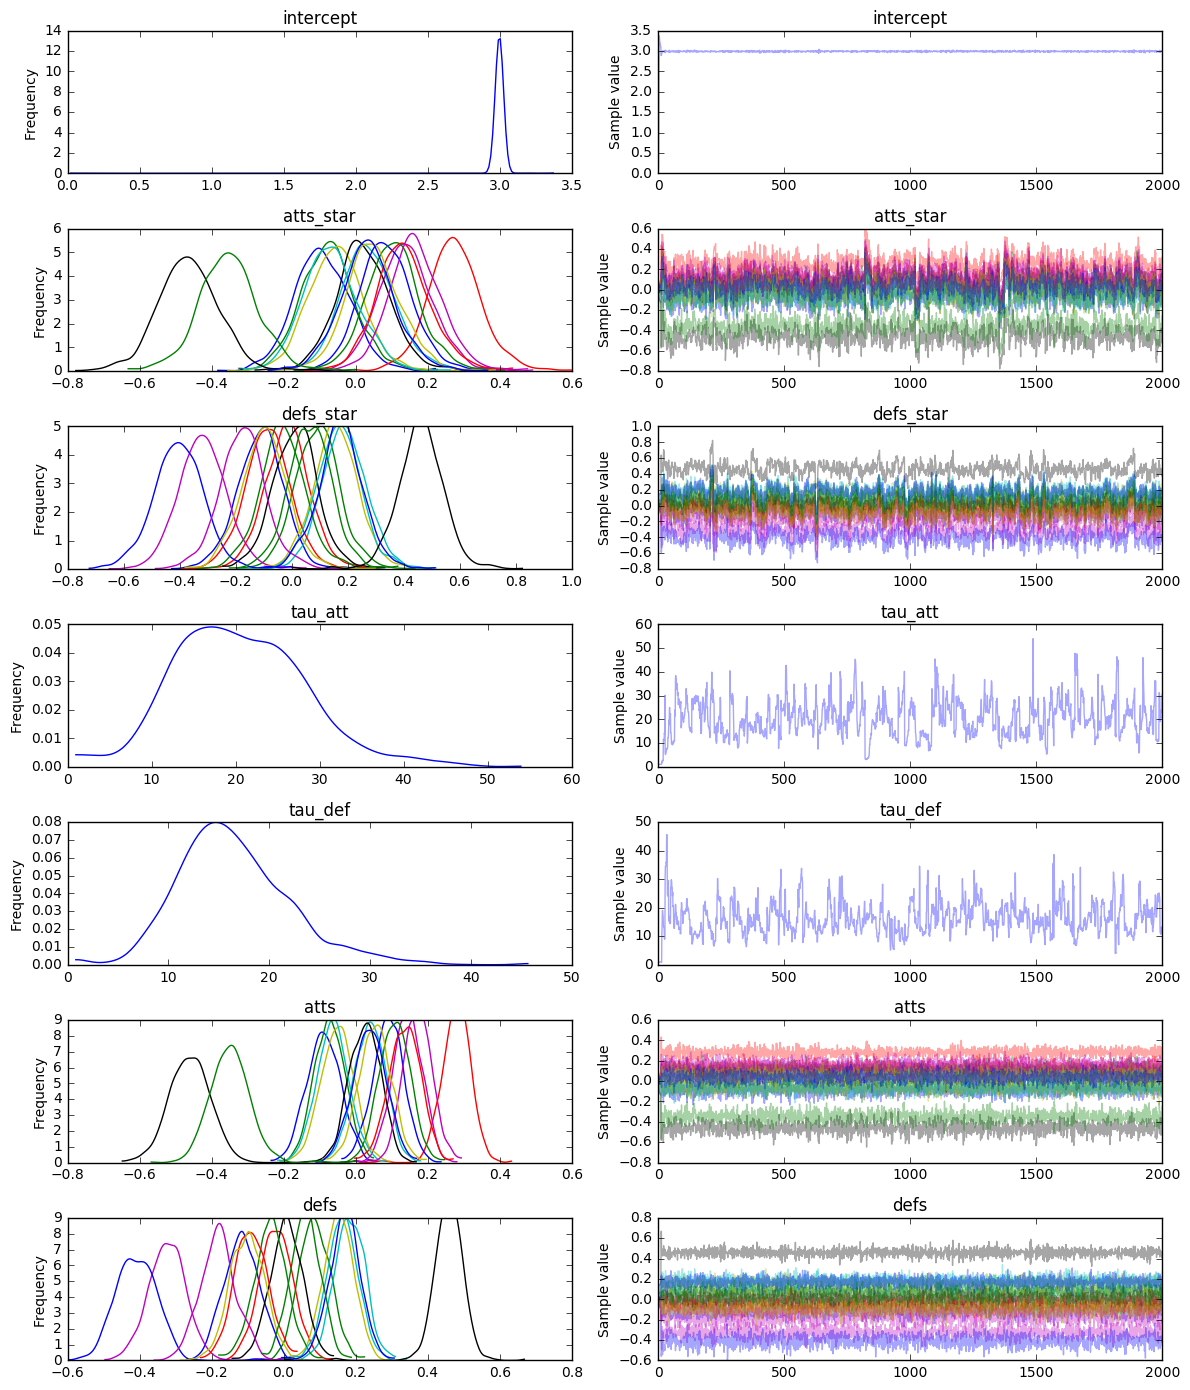

In [9]:
with model:

    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(2000, step, init=start)

    pm.traceplot(trace)

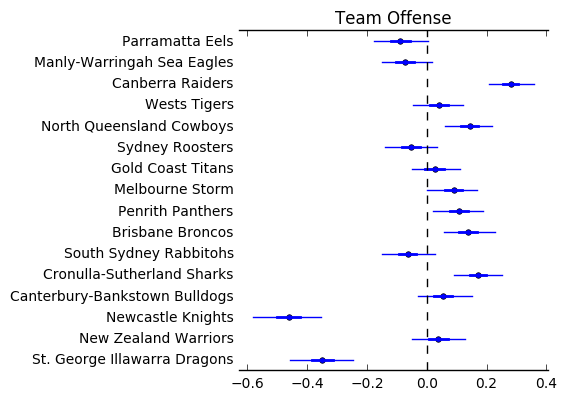

In [10]:
pm.forestplot(trace, varnames=['atts'], ylabels=list(teams['team'].values), main="Team Offense")

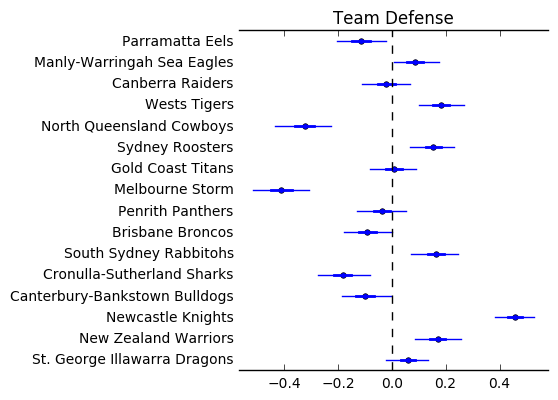

In [11]:
pm.forestplot(trace, varnames=['defs'], ylabels=list(teams['team'].values), main="Team Defense")

In [12]:
atts=trace.get_values(varname='atts')
deff=trace.get_values(varname='defs')

In [13]:
strengths=pd.concat([pd.DataFrame(atts[500:,:],columns=teams['team']).median(),pd.DataFrame(deff[500:,:],columns=teams['team']).median()],axis=1)
strengths.columns=['Attack','Defense']
strengths

,Attack,Defense
team,,
Parramatta Eels,-0.090081,-0.116768
Manly-Warringah Sea Eagles,-0.073029,0.085016
Canberra Raiders,0.281500,-0.020437
Wests Tigers,0.040411,0.181836
North Queensland Cowboys,0.142932,-0.323858
Sydney Roosters,-0.052112,0.153145
Gold Coast Titans,0.026706,0.007497
Melbourne Storm,0.091377,-0.409516
Penrith Panthers,0.109271,-0.035998


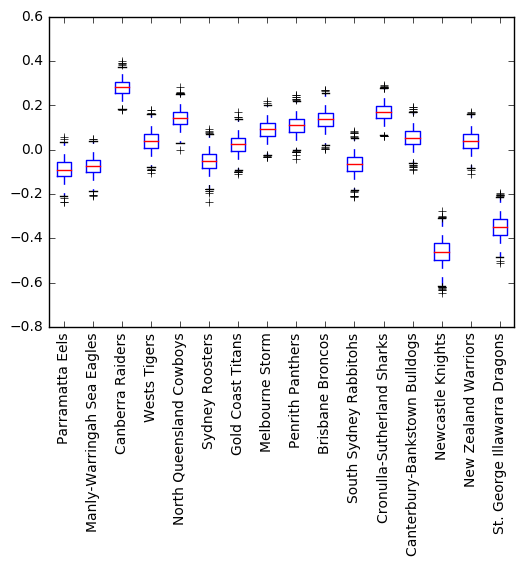

In [14]:
pd.DataFrame(atts[500:,:],columns=teams['team']).plot(kind='box',legend=False,rot=90)

In [15]:
actualresults=data[28].iloc[1:,0:3]
intercept=np.median(trace.get_values(varname='intercept'))
winners=[]
Start2014=('Sydney Roosters','Penrith Panthers'),('North Queensland Cowboys','Brisbane Broncos'),('Melbourne Storm','Canterbury-Bankstown Bulldogs'),('Manly-Warringah Sea Eagles', 'South Sydney Rabbitohs')
Start2015=('Sydney Roosters', 'Melbourne Storm'), ('Canterbury-Bankstown Bulldogs', 'St. George Illawarra Dragons'),('Cronulla-Sutherland Sharks', 'South Sydney Rabbitohs'),('Brisbane Broncos', 'North Queensland Cowboys')
Start2016=actualresults.iloc[:4,[0,2]].values
def run_game(Q):
    home_score=np.random.poisson(np.exp(intercept+strengths.loc[Q[0],'Attack']+strengths.loc[Q[1],'Defense']),1)
    away_score=np.random.poisson(np.exp(intercept+strengths.loc[Q[1],'Attack']+strengths.loc[Q[0],'Defense']),1)
    if home_score>away_score:
        #print(Q[0],'defeated',Q[1],'by ',home_score,'to ',away_score)
        return Q[0],Q[1]
    elif home_score<away_score:
        #print(Q[1],'defeated',Q[0],'by ',away_score,'to ',home_score)
        return Q[1],Q[0]
    else:
        return run_game(Q)
def run_finals():
    QA,QB,QC,QD=Start2016
    PA1,SA1=run_game(QA)
    SA2,_=run_game(QB)
    SB2,_=run_game(QC)
    PB1,SB1=run_game(QD)
    PA2,_=run_game((SB1,SB2))
    F1,_=run_game((PA2,PA1))
    PB2,_=run_game((SA1,SA2))
    F2,_=run_game((PB2,PB1))
    finalist,_=run_game((F1,F2))
    winners.append(finalist)
for i in range(1000):
    run_finals()

In [16]:
simulations=pd.DataFrame(winners,columns=['First'])
simulations['ones']=1

In [17]:
100*simulations.groupby('First').count().sort(columns='ones',ascending=False)/np.sum(simulations.groupby('First').count())

C:\Users\mwpet\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ones
First,
Melbourne Storm,30.2
North Queensland Cowboys,22.4
Cronulla-Sutherland Sharks,15.4
Brisbane Broncos,11.4
Canberra Raiders,9.0
Canterbury-Bankstown Bulldogs,5.3
Penrith Panthers,5.0
Gold Coast Titans,1.3


In [18]:
temp=[]
for i in range(1000):
    temp.append(run_game(('Cronulla-Sutherland Sharks','Melbourne Storm'))[0])
pd.Series(temp).value_counts()

Melbourne Storm               668
Cronulla-Sutherland Sharks    332
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F62FE9AB00>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000001F63538A320>]], dtype=object)

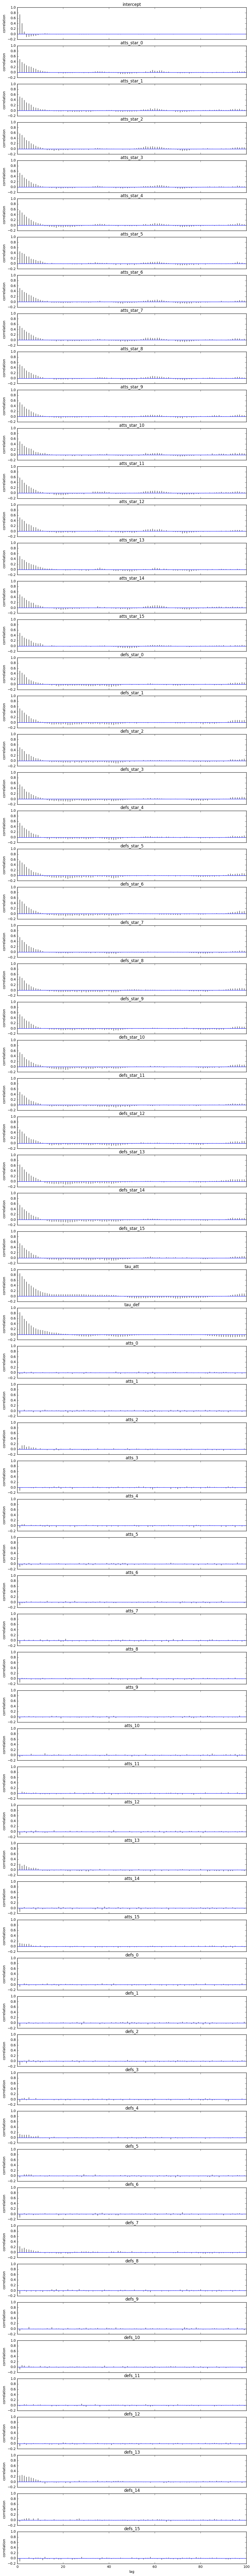

In [19]:
pm.autocorrplot(trace)